In [12]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data

# Visualización de las primeras filas del conjunto de datos (las primeras 5 filas)
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
# Visualización de las primeras filas del DataFrame
print(iris_df.head())

# Verificación de la presencia de datos faltantes (no se esperan valores nulos en un conjunto de datos de Scikit-Learn)
# Pero aún puedes verificar la presencia de NaNs si es necesario:
print("Valores nulos (NaN):", np.isnan(X).sum())

# Cálculo de estadísticas descriptivas
mean = np.mean(X, axis=0)  # Promedio por columna
std_dev = np.std(X, axis=0)  # Desviación estándar por columna
min_val = np.min(X, axis=0)  # Mínimo por columna
max_val = np.max(X, axis=0)  # Máximo por columna

print("Promedio por columna:", mean)
print("Desviación estándar por columna:", std_dev)
print("Valor mínimo por columna:", min_val)
print("Valor máximo por columna:", max_val)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Valores nulos (NaN): 0
Promedio por columna: [5.84333333 3.05733333 3.758      1.19933333]
Desviación estándar por columna: [0.82530129 0.43441097 1.75940407 0.75969263]
Valor mínimo por columna: [4.3 2.  1.  0.1]
Valor máximo por columna: [7.9 4.4 6.9 2.5]


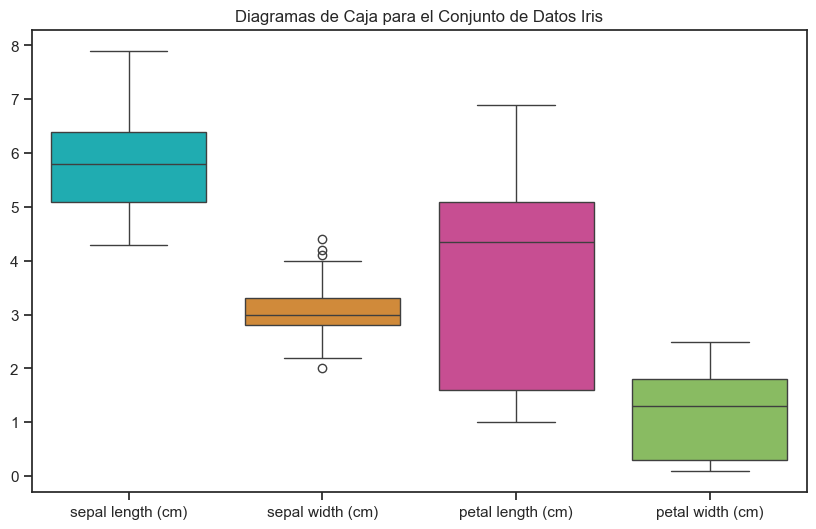

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = ["#08c2c9", "#e98b21", "#db3a94", "#87ca53"]
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, orient="v", palette=custom_palette)
plt.title("Diagramas de Caja para el Conjunto de Datos Iris")
plt.show()

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = pd.read_csv('iris.csv')

print(iris.head())

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
